# Welcome to PyHEP 2020!

This is the third workshop in the series, and it's already a little different.

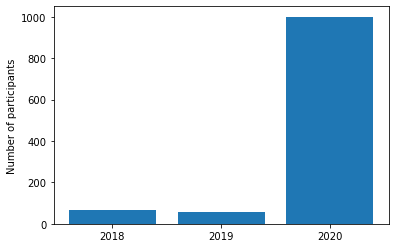

In [6]:
import matplotlib.pyplot as plt

plt.bar(["2018", "2019", "2020"], [68, 55, 1000])
plt.ylabel("Number of participants");

In [58]:
import pandas
df = pandas.read_csv("~/tmp/pyhep2020-survey-results.csv")

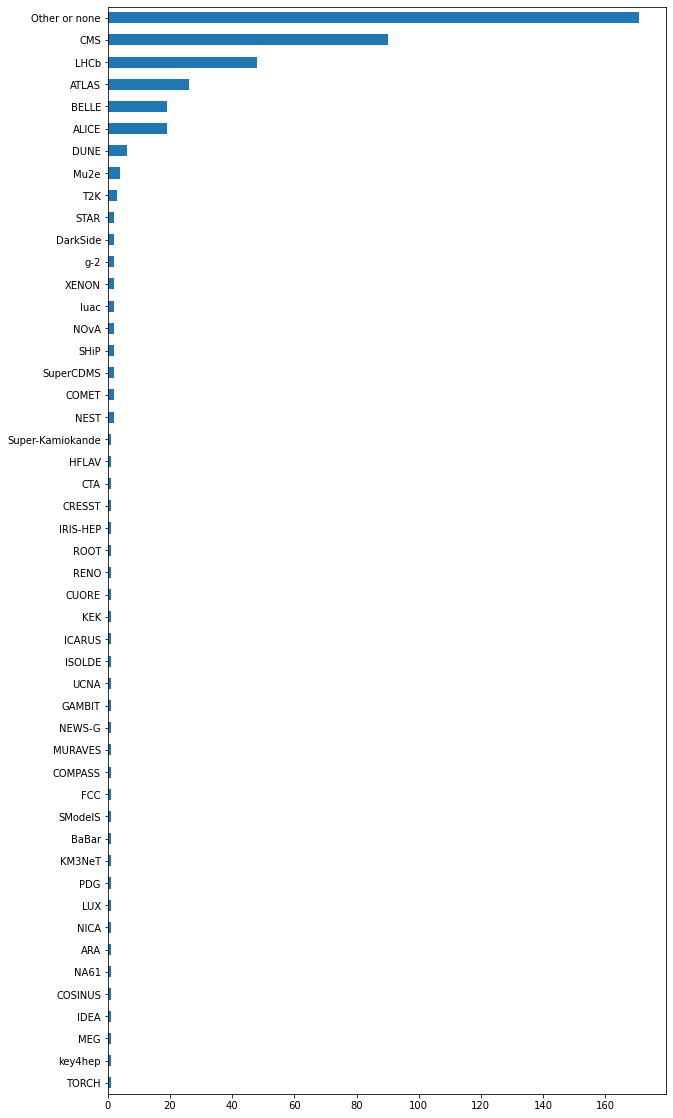

In [82]:
fix_collaboration_names = lambda x: {
    "alice": "ALICE",
    "Alice": "ALICE",
    "ALICE": "ALICE",
    "ALICE member": "ALICE",
    "ATLAS": "ATLAS",
    "ATLAS, BELLE2": "ATLAS;BELLE",
    "ATLAS, Darkside": "ATLAS;DarkSide",
    "ATLAS, FCC, IDEA": "ATLAS;FCC;IDEA",
    "ATLAS, IRIS-HEP": "ATLAS;IRIS-HEP",
    "ATLAS, KM3NeT": "ATLAS;KM3NeT",
    "BaBar, HFLAV, PDG, LHCb, FNAL-E989": "BaBar;HFLAV;PDG;LHCb;g-2",
    "Belle": "BELLE",
    "BELLE": "BELLE",
    "Belle2": "BELLE",
    "Belle, ARA": "BELLE;ARA",
    "Belle / Belle II": "BELLE",
    "Belle, Belle II": "BELLE",
    "belle II": "BELLE",
    "Belle II": "BELLE",
    "Belle II and GAMBIT": "BELLE;GAMBIT",
    "Belle II, CMS": "BELLE;CMS",
    "BELLE I & II": "BELLE",
    "BNL-STAR collaboration": "STAR",
    "cms": "CMS",
    "Cms": "CMS",
    "CMS": "CMS",
    "CMS, ALICE": "CMS;ALICE",
    "CMS, DUNE": "CMS;DUNE",
    "CMS Experiment": "CMS",
    "CMS, SModelS": "CMS;SModelS",
    "COMET": "COMET",
    "COMET MEG": "COMET;MEG",
    "COMPASS": "COMPASS",
    "CRESST, COSINUS": "CRESST;COSINUS",
    "CUORE/CUPID": "CUORE",
    "DarkSide": "DarkSide",
    "DUNE": "DUNE",
    "DUNE (SAND), NICA": "DUNE;NICA",
    "I am currently associated with Belle and Belle 2 experiments.": "BELLE",
    "I am in a team that they are in collaboration with CMS and I am going to join in a CERN group.": "CMS",
    "ICARUS and DUNE": "ICARUS;DUNE",
    "I'm associated with CMS experiment": "CMS",
    "ISOLDE": "ISOLDE",
    "Iuac": "Iuac",
    "Just switched from CMS to CTA": "CTA",
    "KEK": "KEK",
    "key4hep": "key4hep",
    "lhcb": "LHCb",
    "LHCb": "LHCb",
    "LHCb SHiP": "LHCb;SHiP",
    "LHCb, SHiP": "LHCb;SHiP",
    "LHCb, TORCH": "LHCb;TORCH",
    "LUX, NEST": "LUX;NEST",
    "Mu2e": "Mu2e",
    "Mu2e, a few small instrumentation efforts outside Mu2e": "Mu2e",
    "Mu2e, Muon g-2": "Mu2e;g-2",
    "Mu2e, NEWS-G": "Mu2e;NEWS-G",
    "MUon RAdiography of Mt VESuvius (MURAVES)": "MURAVES",
    "NA61/SHINE Experiment": "NA61",
    "NOvA": "NOvA",
    "NOvA, DUNE": "NOvA;DUNE",
    "RENO,BELLE2, etc": "RENO;BELLE",
    "ROOT": "ROOT",
    "STAR": "STAR",
    "SuperCDMS": "SuperCDMS",
    "Super CDMS": "SuperCDMS",
    "Super-Kamiokande, T2K, DUNE": "Super-Kamiokande;T2K;DUNE",
    "T2K": "T2K",
    "UCNA": "UCNA",
    "XENON (direct dark matter search)": "XENON",
    "XENON    NEST": "XENON;NEST",
    "Yes. Belle and Belle II": "BELLE",
    "Yes, Belle II collaboration. :)": "BELLE",
    "yes, CMS": "CMS",
    "Yes: CMS": "CMS",
    "Yes, with ATLAS.": "ATLAS",
}.get(x, "Other or none")
pandas.DataFrame(df[
    ["Professional life: Are you associated with one or more experimental or theoretical collaborations? (E.g. ATLAS, CMS, DUNE, USQCD...)"]
].applymap(fix_collaboration_names).iloc[:, 0].str.split(";").tolist()).stack().value_counts(ascending=True).plot.barh(figsize=(10, 20))

<img src="collaboration-logos.png" width="1000px">

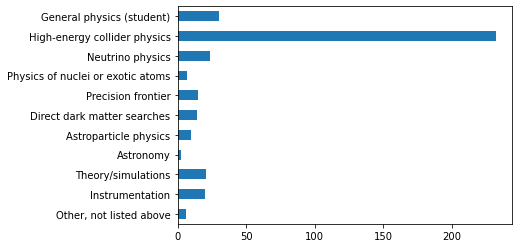

In [121]:
options = [
    "General physics (student)",
    "High-energy collider physics",
    "Neutrino physics",
    "Physics of nuclei or exotic atoms",
    "Precision frontier",
    "Direct dark matter searches",
    "Astroparticle physics",
    "Astronomy",
    "Theory/simulations",
    "Instrumentation",
    "Other, not listed above",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if option in responses else 0.0 for option in options]
exploded = df[["Professional life: If you're involved in physics, what area(s) do you study?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=options)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh();

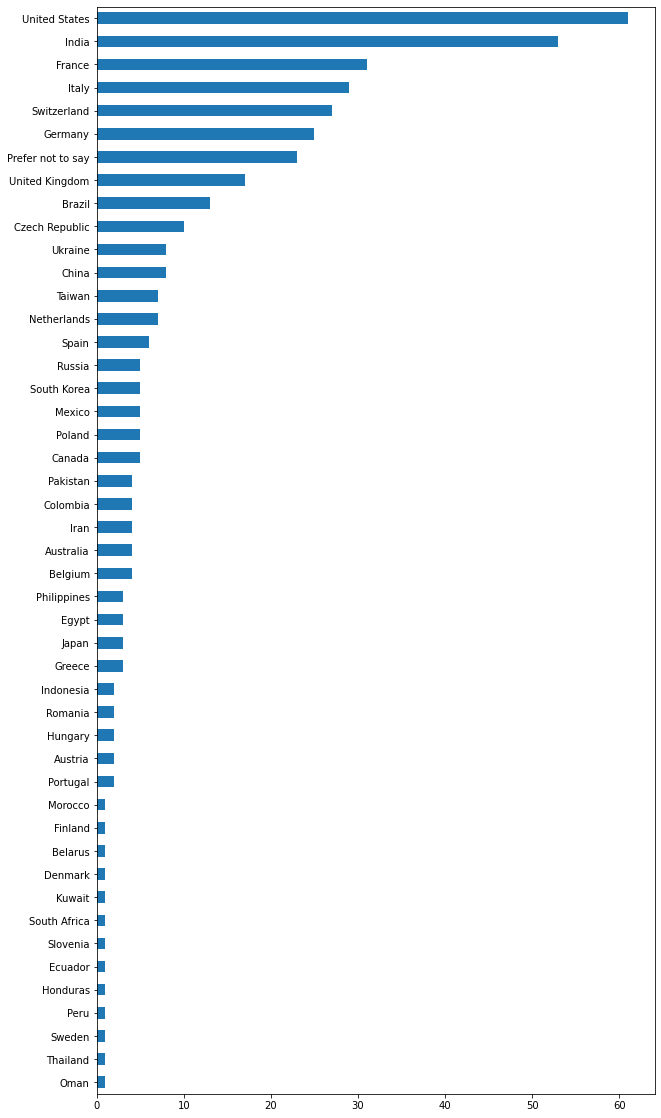

In [83]:
def fix_country_names(name):
    name = " ".join(x.capitalize() for x in str(name).strip(" '\"").split())
    name = {
        "Brasil": "Brazil",
        "Canada (east)": "Canada",
        "Canada (montreal)": "Canada",
        "Ch": "Switzerland",
        "Czech Rep.": "Czech Republic",
        "Czechia": "Czech Republic",
        "France (cern-based)": "France",
        "Greeve": "Greece",
        "México": "Mexico",
        "Netherlands. Time Slot Also Dependent On Another Conference. So Need To Be Able To Attend Both.": "Netherlands",
        "Osaka, Japan": "Japan",
        "Republic Of Korea": "South Korea",
        "Russia Federation": "Russia",
        "S.korea": "South Korea",
        "Stockholm": "Sweden",
        "Taiwan (r.o.c.)": "Taiwan",
        "The Netherlands": "Netherlands",
        "The U.s": "United States",
        "Uk": "United Kingdom",
        "U.s.": "United States",
        "U.s.a.": "United States",
        "United State": "United States",
        "Us": "United States",
        "Us (est)": "United States",
        "Usa": "United States",
        "Usa (chicago)": "United States",
        "Usa - Michigan": "United States",
        "United States Of America": "United States",
        "United Status": "United States",
        "Nan": "Prefer not to say",
    }.get(name, name)
    return name
df[["PyHEP feedback: In what country do you currently reside?"]].applymap(fix_country_names).iloc[:, 0].value_counts(ascending=True).plot.barh(figsize=(10, 20))

In [112]:
# https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10
import folium
import folium.plugins
import pycountry_convert
import geopy

geolocator = geopy.geocoders.Nominatim(user_agent="PyHEP2020")
world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = folium.plugins.MarkerCluster().add_to(world_map)
countries = df[["PyHEP feedback: In what country do you currently reside?"]].applymap(fix_country_names).iloc[:, 0].value_counts()
for country, count in countries.items():
    try:
        two_letter = pycountry_convert.country_name_to_country_alpha2(country)
    except:
        pass
    else:
        loc = geolocator.geocode(two_letter)
        for i in range(count):
            folium.CircleMarker(location=(loc.latitude, loc.longitude), radius=5, fill=True).add_to(marker_cluster)
        print(f"{count} in {country} (lat {loc.latitude} lng {loc.longitude})")

world_map

61 in United States (lat 39.7837304 lng -100.4458825)
53 in India (lat 22.3511148 lng 78.6677428)
31 in France (lat 46.603354 lng 1.8883335)
29 in Italy (lat 42.6384261 lng 12.674297)
27 in Switzerland (lat 46.7985624 lng 8.2319736)
25 in Germany (lat 51.0834196 lng 10.4234469)
17 in United Kingdom (lat 54.7023545 lng -3.2765753)
13 in Brazil (lat -10.3333333 lng -53.2)
10 in Czech Republic (lat 49.8167003 lng 15.4749544)
8 in Ukraine (lat 49.4871968 lng 31.2718321)
8 in China (lat 35.000074 lng 104.999927)
7 in Taiwan (lat 23.9739374 lng 120.9820179)
7 in Netherlands (lat 52.5001698 lng 5.7480821)
6 in Spain (lat 39.3262345 lng -4.8380649)
5 in Russia (lat 64.6863136 lng 97.7453061)
5 in South Korea (lat 36.638392 lng 127.6961188)
5 in Mexico (lat 22.5000485 lng -100.0000375)
5 in Poland (lat 52.215933 lng 19.134422)
5 in Canada (lat 61.0666922 lng -107.9917071)
4 in Pakistan (lat 30.3308401 lng 71.247499)
4 in Colombia (lat 2.8894434 lng -73.783892)
4 in Iran (lat 32.6475314 lng 54.5

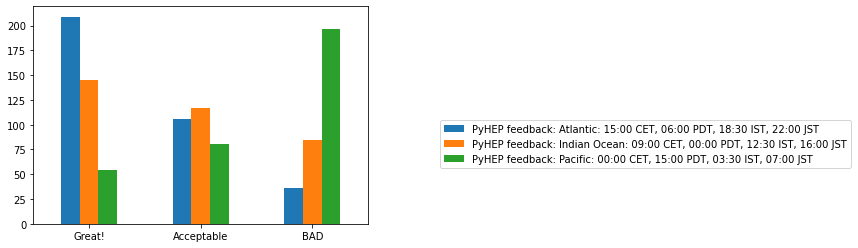

In [116]:
df[[
    "PyHEP feedback: Atlantic: 15:00 CET, 06:00 PDT, 18:30 IST, 22:00 JST",
    "PyHEP feedback: Indian Ocean: 09:00 CET, 00:00 PDT, 12:30 IST, 16:00 JST",
    "PyHEP feedback: Pacific: 00:00 CET, 15:00 PDT, 03:30 IST, 07:00 JST",
]].apply(pandas.Series.value_counts).loc[["Great!", "Acceptable", "BAD"]].plot.bar(rot=0).legend(bbox_to_anchor=(1.2, 0.5));

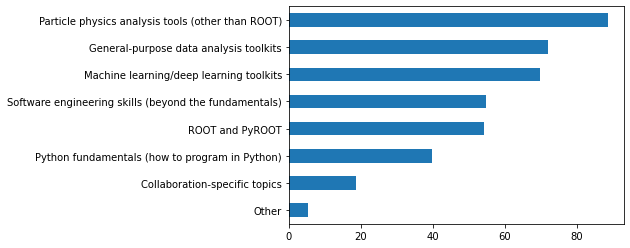

In [122]:
hopes = [
    "Particle physics analysis tools (other than ROOT)",
    "General-purpose data analysis toolkits",
    "Machine learning/deep learning toolkits",
    "Software engineering skills (beyond the fundamentals)",
    "ROOT and PyROOT",
    "Python fundamentals (how to program in Python)",
    "Collaboration-specific topics",
    "Other",
]
def explode(responses):
    responses = [response.strip() for response in responses.split(";")]
    return [1.0 if hope in responses else 0.0 for hope in hopes]
exploded = df[["PyHEP feedback: What are you hoping to learn from this workshop?"]].fillna("").applymap(explode)
indicator = pandas.DataFrame(exploded.iloc[:, 0].tolist(), columns=hopes)
indicator.div(indicator.sum(axis=1), axis=0).sum(axis=0).iloc[::-1].plot.barh();